# Stock Market using Moving Average and Linear Regression

    Stock Market Prediction is a Time Series analysis problem where in we have to predict the stovk price in the future. Moving Average is one of the widely used algorithm in Time series problem. But Linear Regression is not used mostly in time series analysis. When i came across th following reference in Analytic Vidya, i tried both the moving average and Linear Regression here. While Moving average is solved the same way from the website, the Linear Regression analysis here was given more features and preprocessing.  


Ref: https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/?utm_source=facebook.com&utm_medium=social

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

    Data is from TataGlobal. Containing the Stock prices on Financial days.

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

    The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
    High, Low and Last represent the maximum, minimum, and last price of the share for the day.
    Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.


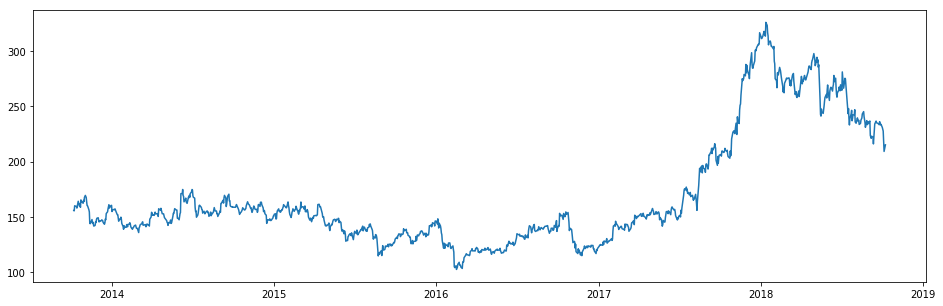

In [3]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,5))
plt.plot(df['Close'], label='Close Price history')
plt.show()

# Moving Average

In [4]:
data = df.sort_index(ascending=True, axis=0)
new_data = data[['Close']]

train = new_data[:987]
valid = new_data[987:]


In [5]:
print(train.shape)
print(valid.shape)

(987, 1)
(248, 1)


In [6]:
pred = []

for i in range(len(valid)):
    a = train.Close[987-248+i:].sum() + sum(pred)
    b = a/248
    pred.append(b)

print("Root Mean Square Error of Prediction:",np.mean([x**2 for x  in pred])**0.5)
valid['prediction']=pred
valid

Root Mean Square Error of Prediction: 162.3123240652279


,Close,prediction
Date,,
2017-10-09,208.30,152.306452
2017-10-10,208.45,152.310711
2017-10-11,209.40,152.313376
2017-10-12,212.00,152.331373
2017-10-13,210.25,152.327871
...,...,...
2018-10-01,230.90,163.132287
2018-10-03,227.60,162.960239
2018-10-04,218.20,162.784877


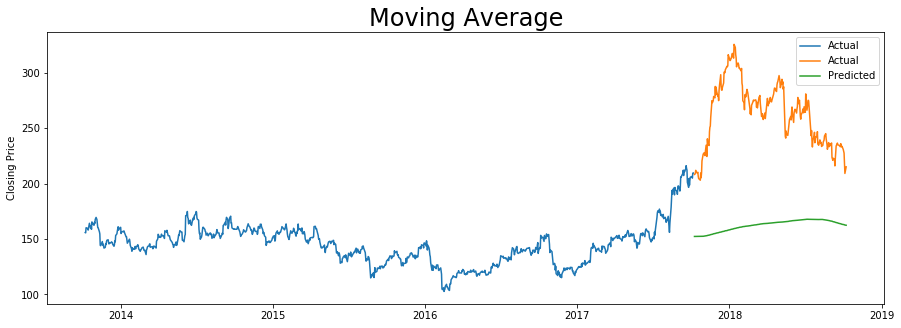

In [7]:
plt.figure(figsize=(15,5))
plt.plot(train.Close,label='Actual')
plt.plot(valid.Close,label = 'Actual')
plt.plot(valid.prediction,label='Predicted')
plt.legend()
plt.title("Moving Average",fontsize=24)
plt.ylabel("Closing Price")
plt.show()

In [8]:
mean_squared_error(valid.Close,valid.prediction)

10923.2085242617

# Linear Regression

   Linear Regression is a most widely used algorithm in general. It also finds a place in Time Series analysis. In linear regression, the results are linear combination of the inputs. In time series analysis  we have only time as input. What is the Feature we can extract from time? We can see what is the day of the week. We can have the day of the month. Day of the financial year. 

In [9]:
new_data = new_data.reset_index()
new_data

,Date,Close
0,2013-10-08,155.80
1,2013-10-09,155.55
2,2013-10-10,160.15
3,2013-10-11,160.05
4,2013-10-14,159.45
...,...,...
1230,2018-10-01,230.90
1231,2018-10-03,227.60
1232,2018-10-04,218.20
1233,2018-10-05,209.20


In [10]:
import datetime as dt
new_data['Day of the Week'] = new_data.Date.apply(dt.datetime.weekday)

new_data['Day of the Year'] = [str(m-dt.datetime(m.year,1,1)).split()[0] for m in new_data.Date]

new_data['Day of the Year'] = new_data['Day of the Year'].astype(int)
new_data['Month'] = [m.month for m in new_data.Date]
new_data['Day of the Month'] = [m.day for m in new_data.Date]
new_data['year'] = [m.year for m in new_data.Date]
new_data = new_data.set_index('Date')
new_data

,Close,Day of the Week,Day of the Year,Month,Day of the Month,year
Date,,,,,,
2013-10-08,155.80,1,280,10,8,2013
2013-10-09,155.55,2,281,10,9,2013
2013-10-10,160.15,3,282,10,10,2013
2013-10-11,160.05,4,283,10,11,2013
2013-10-14,159.45,0,286,10,14,2013
...,...,...,...,...,...,...
2018-10-01,230.90,0,273,10,1,2018
2018-10-03,227.60,2,275,10,3,2018
2018-10-04,218.20,3,276,10,4,2018


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

ohe = OneHotEncoder(sparse=False)
ohe.fit(np.array(range(7)).reshape(-1,1))
cat = ohe.transform(np.expand_dims(new_data['Day of the Week'],axis=1))
cat = pd.DataFrame(cat,columns=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],index=new_data.index)
new_data.drop('Day of the Week',axis=1,inplace=True)
new_data = pd.concat([new_data,cat],axis=1)
new_data

,Close,Day of the Year,Month,Day of the Month,year,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,,,,,
2013-10-08,155.80,280,10,8,2013,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2013-10-09,155.55,281,10,9,2013,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013-10-10,160.15,282,10,10,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2013-10-11,160.05,283,10,11,2013,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-10-14,159.45,286,10,14,2013,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,230.90,273,10,1,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-03,227.60,275,10,3,2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-10-04,218.20,276,10,4,2018,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
ss = StandardScaler()

train = new_data[:947]
test = new_data[947:]

y_train = train.Close
X_train = train.drop('Close',axis=1)

y_test = test.Close
X_test = test.drop('Close',axis=1)

X_train =pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns,index=X_train.index)
X_test =pd.DataFrame(ss.transform(X_test),columns = X_test.columns,index=X_test.index)


In [13]:
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = lr.predict(X_test)
y_pred = pd.Series(y_pred,index=y_test.index)
mean_squared_error(y_test,y_pred)

15729.265366143747

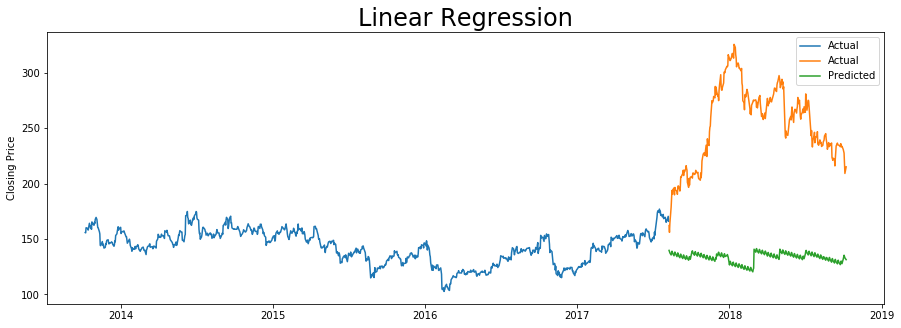

In [15]:
plt.figure(figsize=(15,5))
plt.plot(train.Close,label='Actual')
plt.plot(y_test,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend()
plt.title("Linear Regression",fontsize=24)
plt.ylabel("Closing Price")
plt.show()

    The Mean Square Error obtained for Linear Regression was much more than the Moving Average method. So Linear Regression is not a good choice in this case as well as in many other cases. This Linear regression can better suit for time series that are stationary. 